# The Role of Big Data in Optimising Inventory Management in the UK Food Retail Industry

**BA (Hons) Global Business Management Dissertation**

**Author:** Jonathan Duque González · University of Suffolk  
**Supervisor:** Dr Bharati Rathore  
**Date:** February 2026

---

📄 **Full Dissertation:** [Google Docs](https://docs.google.com/document/d/1-qCnUn2IiR2hAKZ4Be6n_TbA5-YWT4BR/edit?usp=sharing&ouid=108141792940395886349&rtpof=true)  
💻 **Repository:** [github.com/jduquegonzalez](https://github.com/jduquegonzalez)  
📊 **Data & Extraction Matrix:** Available in the repository's `data/` directory

> *This notebook is a condensed, interactive companion to the full dissertation. Figures are generated by importing the source scripts from the `src/` directory; tables are rendered as styled DataFrames. The full dissertation text, complete reference list, and appendices are available via the links above.*

## Abstract

**Purpose:** This dissertation investigates big data's role in optimising inventory management within UK food retail, examining current technologies, analysing effectiveness in reducing costs and surplus, and assessing scaling challenges.

**Design/methodology/approach:** An interpretivist, inductive design employs qualitative archival analysis of corporate reports and industry publications from ten UK food retailers. AI-assisted extraction with human validation codes findings against TOE, SCOR, and 5Vs frameworks.

**Findings:** Technology leaders (Ocado, Tesco, Sainsbury's) achieve quantifiable benefits — £1.6bn reported cumulative savings, 190bps availability improvement — through prescriptive/predictive analytics. A complexity-efficiency trade-off emerges: Lidl (Diagnostic, 97.9%) outperforms technology leaders through demand consolidation, whilst Aldi (Predictive, 97.7%) achieves comparable availability by combining limited-SKU simplicity with analytics investment — suggesting demand consolidation amplifies rather than substitutes for analytical capability. The genuinely novel finding is the **3.9× surplus differential** between Aldi (Predictive, 0.47%) and Lidl (Diagnostic, 1.81%) — demonstrating that analytics maturity and execution quality compound to produce dramatically different outcomes despite similar operational models. Systematic barriers span technological (60% SKU inaccuracy), organisational (52% unclear use cases, 90% talent gap), and environmental dimensions (UK 3.9% investment gap versus G7).

**Originality/value:** This research makes three contributions to knowledge. First, it extends the TOE Framework application to UK food retail big data adoption, demonstrating that technological capability proves insufficient without organisational readiness. Second, the Aldi-Lidl differential highlights a **maturity gap** where Aldi's investment in predictive automated ordering yields dramatically lower surplus (0.47%) compared to Lidl's reliance on diagnostic tools and manual processes (1.81%) — demonstrating that analytics maturity and execution quality compound within similar operational models. Third, the finding that targeted interventions can outperform comprehensive strategies challenges linear assumptions about analytics maturity and inventory efficiency.

**Keywords:** big data, inventory management, UK food retail, machine learning, demand forecasting, TOE framework

In [1]:
# ═══════════════════════════════════════════════════════════════
# ENVIRONMENT SETUP
# ═══════════════════════════════════════════════════════════════

import sys
import os
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd

# Add source directories to path for imports
REPO_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, os.path.join(REPO_ROOT, 'src', 'chapter1'))
sys.path.insert(0, os.path.join(REPO_ROOT, 'src', 'chapter2'))
sys.path.insert(0, os.path.join(REPO_ROOT, 'src', 'chapter4'))
sys.path.insert(0, os.path.join(REPO_ROOT, 'src', 'appendices'))

# Consistent styling
plt.rcParams.update({
    'font.family': 'DejaVu Sans',
    'font.size': 10,
    'axes.labelsize': 11,
    'axes.titlesize': 12,
    'figure.facecolor': 'white',
    'figure.dpi': 150,
})

print("✓ Environment ready")
print(f"  Repository root: {REPO_ROOT}")
print(f"  Source paths added for script imports")

✓ Environment ready
  Repository root: /Users/jonathanduquegonzalez/Documents/GitHub/uk-food-retail-big-data
  Source paths added for script imports


## Chapter 1: Introduction

### Research Background

Valued at approximately **£195.3 billion** (Savills, 2025), the UK food retail industry is a crowded market experiencing a price war, with **average operating margins** remaining historically low — the Competition and Markets Authority's *Groceries Sector Review* (CMA, 2024) reports averages below **3%** for major retailers, with some operators reporting margins as thin as **0.7–1.7%** during peak inflationary pressure. During the last decade, discounters Aldi and Lidl together have more than doubled their combined market share, moving from **10%** in 2015 (Kantar, 2015) to **~19%** as of November 2025 (Kantar, 2025), whilst traditional supermarkets have lost ~10% market share.

### Research Aim & Objectives

> **Aim:** To assess the role of big data in optimising inventory management in the UK food retail sector.

1. To examine current BD technologies and their impact on inventory management
2. To analyse the effectiveness of BD technologies in reducing inventory costs and waste
3. To assess the challenges and opportunities in scaling BD technologies

### The Triple Squeeze

Four converging pressures justify this research: **intensifying cost pressures** (38.5% cumulative food price increase 2020–2025; NLW up 76.5% since 2016; employer NIC risen to 15%); **environmental impact** (270,000 tonnes of annual retail food waste — equivalent to 190 million discarded meals); **the tension between efficiency and resilience**; and **the declining alignment of traditional inventory methods** with modern retail environments.

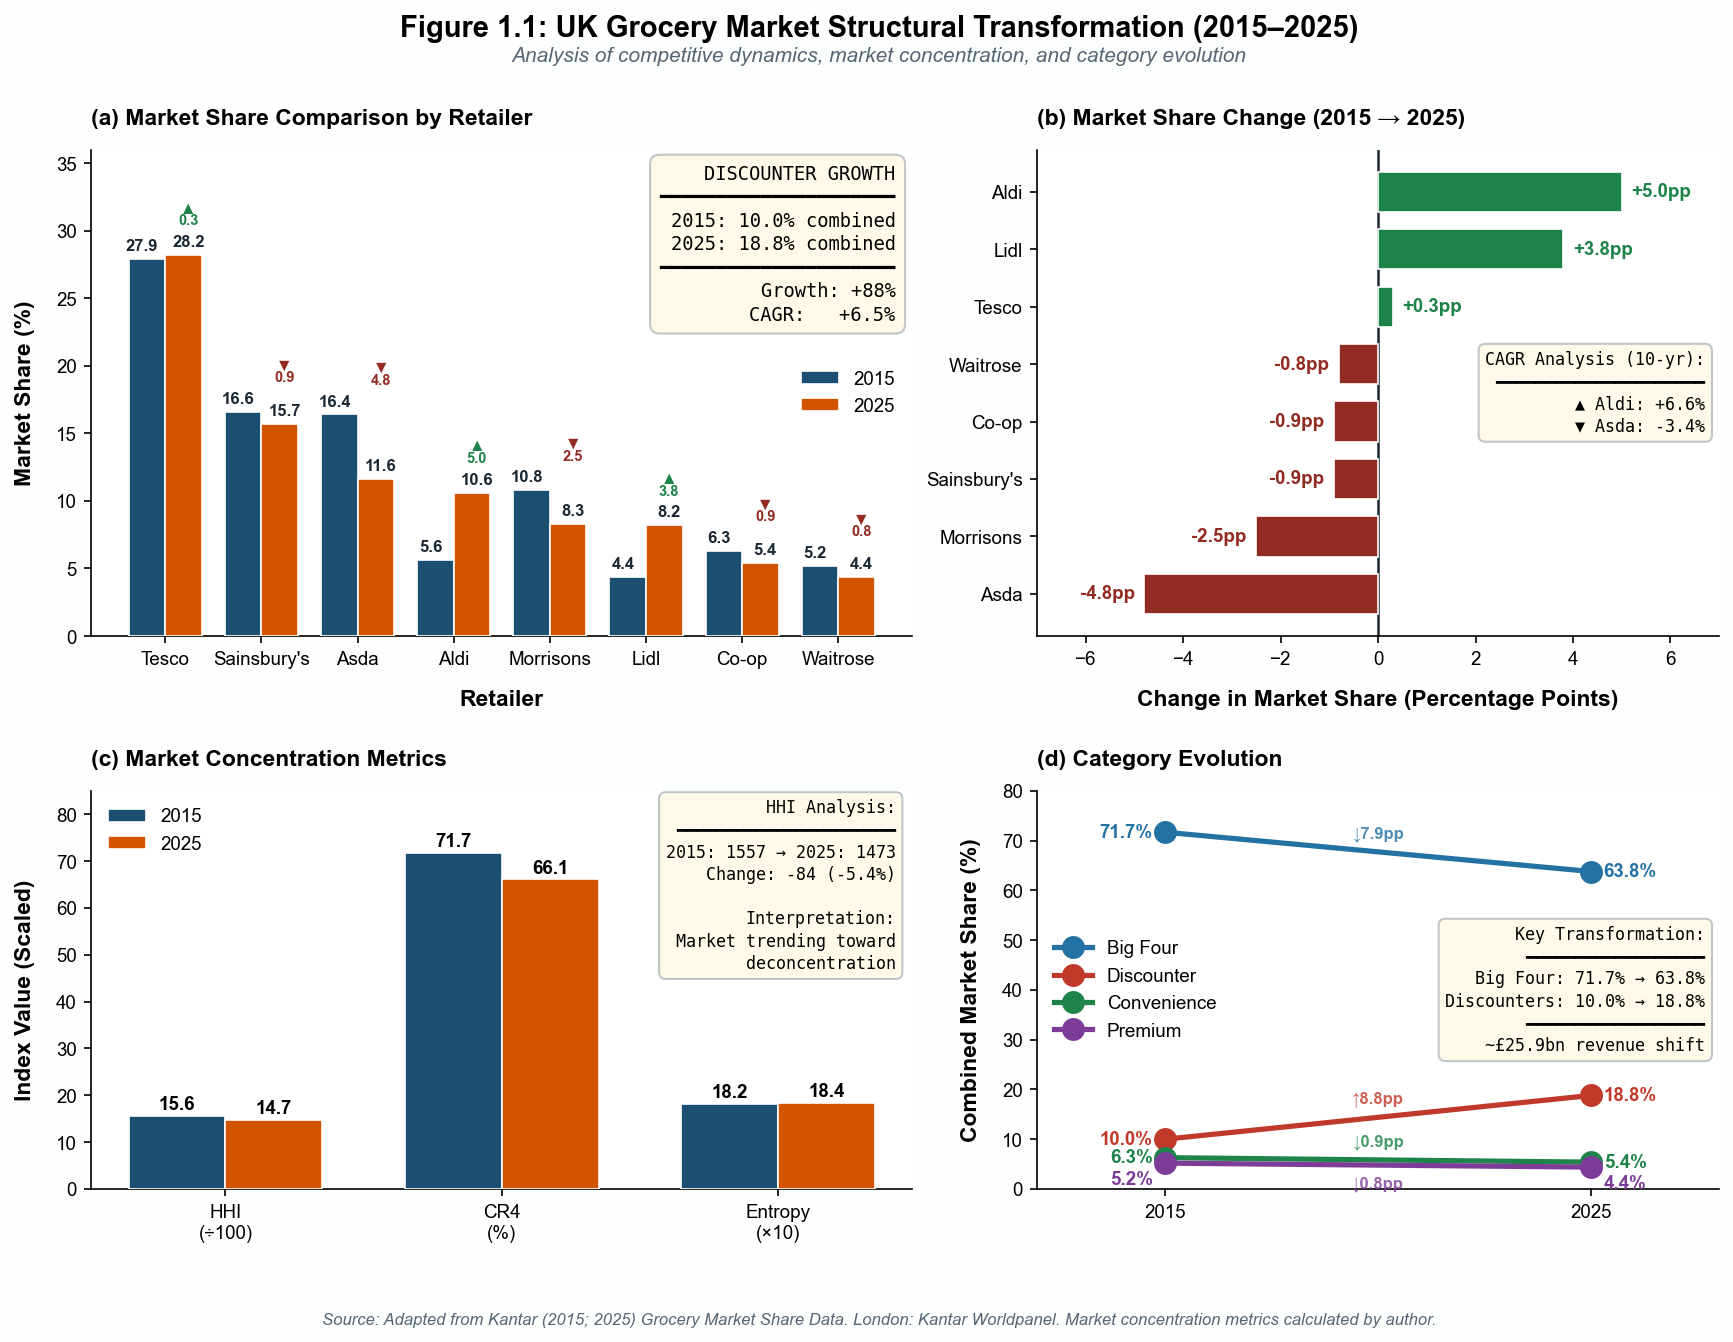

In [2]:
# ═══════════════════════════════════════════════════════════════
# FIGURE 1.1: UK Grocery Market Structural Transformation (2015-2025)
# Source: Kantar (2015; 2025) Grocery Market Share Data
# ═══════════════════════════════════════════════════════════════

from figure_1_1_market_transformation import MarketData, MarketAnalysisVisualisation, ChartConfig

market_data = MarketData()
config = ChartConfig(figure_width=14, figure_height=9, dpi=150, output_formats=())
viz = MarketAnalysisVisualisation(market_data, config)
fig = viz.generate()
plt.show()

### Cost Pressure Evidence: UK Food Price Inflation

The scale of these cost pressures is visible in the food price inflation trajectory. ONS (2025) data shows food prices increased **38.5% cumulatively** over five years (November 2020 to November 2025), peaking at **19.1% annual inflation** in March 2023 — nearly ten times the Bank of England's 2% target. Although moderating to 4.2% by November 2025, food inflation remains above target, intensifying the efficiency imperative across the sector.

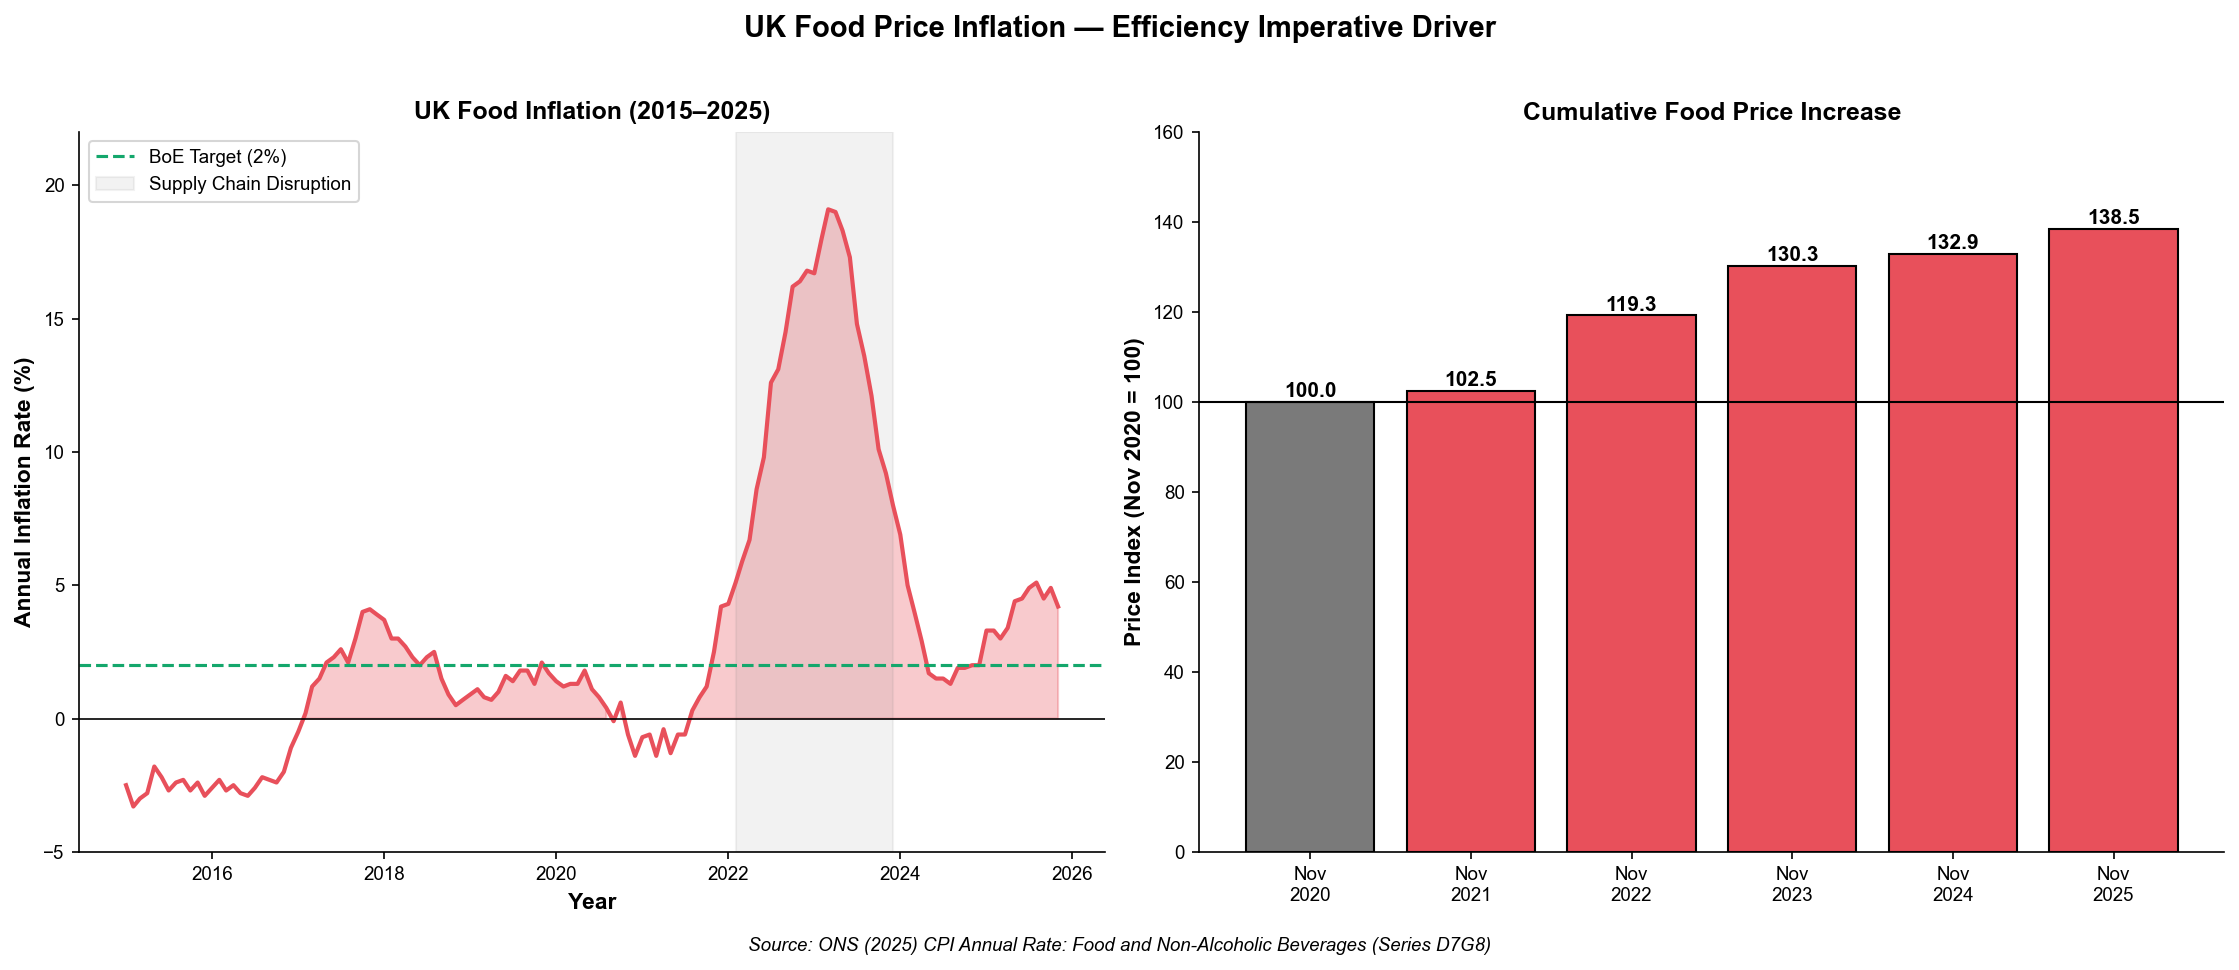

In [3]:
# ═══════════════════════════════════════════════════════════════
# APPENDIX D: UK Food Price Inflation (ONS Series D7G8)
# Source: ONS (2025) CPI Annual Rate: Food & Non-Alcoholic Beverages
# Note: Requires data/series-160126.xls
#       Download from: https://www.ons.gov.uk/economy/inflationandpriceindices/timeseries/d7g8/mm23
# ═══════════════════════════════════════════════════════════════

from appendix_d_retail_cost_pressures import load_data, generate_figure

try:
    df = load_data()
    fig = generate_figure(df)
    plt.show()
except FileNotFoundError:
    print("⚠️  Data file not found: series-160126.xls")
    print("    Download from: https://www.ons.gov.uk/economy/inflationandpriceindices/timeseries/d7g8/mm23")
    print("    Place in: data/ directory")
    print()
    print("    Key statistic: 38.5% cumulative food price increase (Nov 2020–Nov 2025)")
    print("    Peak: 19.1% annual inflation (March 2023)")

## Chapter 2: Literature Review

### Theoretical Framework

This research employs three complementary analytical frameworks:

| Framework | Purpose | Key Application |
|-----------|---------|-----------------|
| **TOE Framework** (Tornatzky & Fleischer, 1990) | Organises adoption factors across technological, organisational, and environmental dimensions | Explains why adoption outcomes vary across retailers |
| **SCOR Model** (APICS, 2017) | Structures supply chain process analysis (Plan, Source, Make, Deliver, Return, Enable) | Maps technology investments to inventory processes |
| **5Vs Framework** (Laney, 2001; Stedman, 2022) | Characterises big data: Volume, Velocity, Variety, Veracity, Value | Comparative assessment of data capabilities |

### Analytics Maturity Typology

The literature identifies a four-tier maturity model: *descriptive* → *diagnostic* → *predictive* → *prescriptive*. Globally, **72%** of Gartner's (2023) survey respondents have deployed descriptive analytics, whilst just **26%** have adopted prescriptive capabilities — a **46 percentage point maturity gap**. Nationwide, with only 22%, the adoption in UK food retail remains nascent (BearingPoint, 2024).

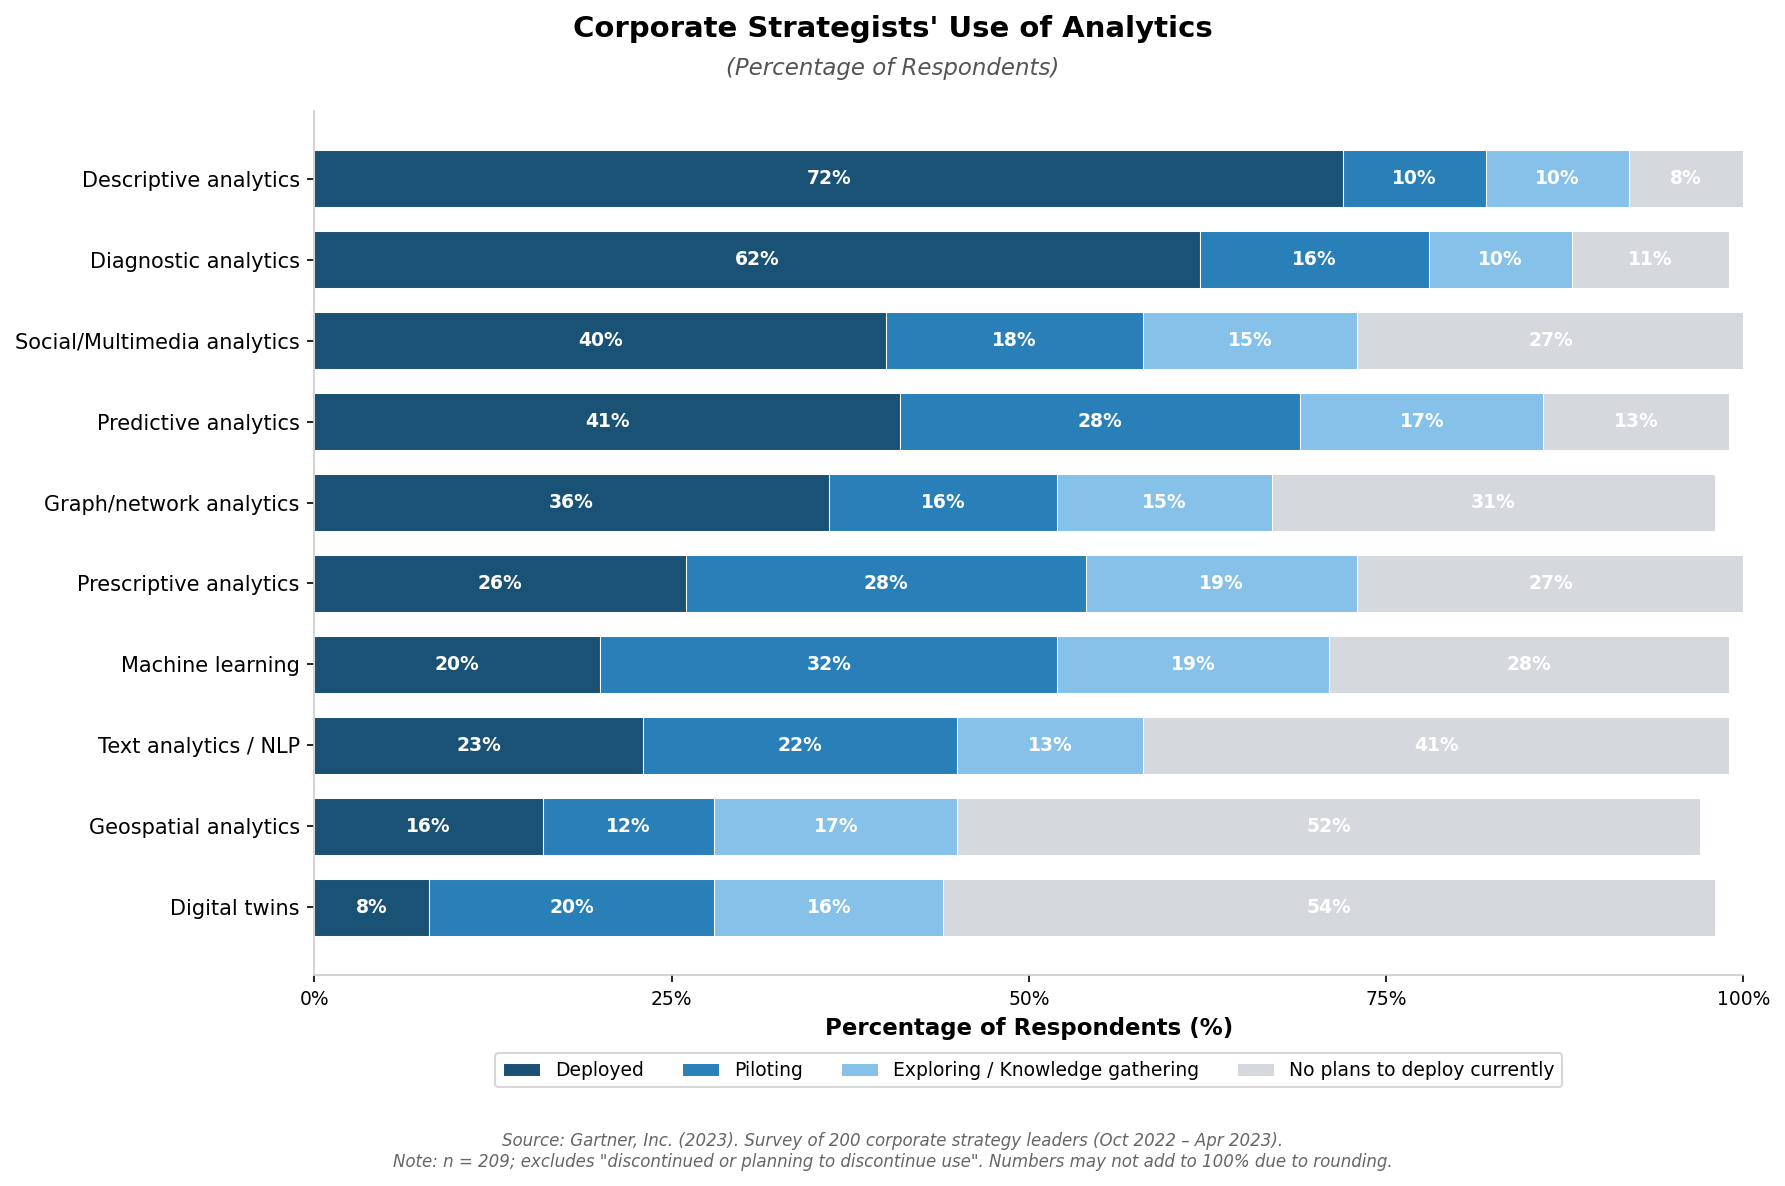

In [4]:
# ═══════════════════════════════════════════════════════════════
# FIGURE 2.1: Corporate Strategists' Use of Analytics
# Source: Gartner (2023) Survey of 209 corporate strategists
# ═══════════════════════════════════════════════════════════════

from figure_2_1_analytics_adoption import generate_figure

fig = generate_figure()
plt.show()

## Chapter 3: Research Methodology

### Design Summary

| Element | Choice | Justification |
|---------|--------|---------------|
| **Philosophy** | Interpretivism | Corporate reports are subjective narratives, not neutral facts |
| **Approach** | Inductive | Patterns emerge from systematic evidence examination |
| **Method** | Qualitative (mono-method) | Captures complex contextual factors |
| **Design** | Descriptive, cross-sectional | Contemporary snapshot (FY 2024/25) |
| **Strategy** | Archival/documentary | Systematic analysis of published records |
| **Data sources** | 4 categories | Corporate reports (10 retailers), government, academic, industry |
| **Analysis** | Thematic (computer-assisted) | AI-assisted extraction + human validation |

### Sample Characteristics

The AI-assisted extraction process yielded **302 distinct extracts** drawn from **49 organisations**, including ten UK food retailers, six trade associations, three government bodies, and thirty consultancy, vendor, and academic sources. Extracts underwent systematic verification with a **9.9% rejection rate**, confirming the rigour of the human-in-the-loop validation protocol.

## Chapter 4: Findings and Analysis

### Objective 1: Current Big Data Technologies and Their Impact

The analysis reveals substantial heterogeneity in inventory management technology deployment. KPMG (2025) found that 47% of retailers now consider AI core to their business, yet clear stratification emerges: prescriptive leaders **Ocado** and **Tesco**, alongside predictive adopters **Sainsbury's**, **M&S**, **Aldi**, **Asda**, and **Iceland**, contrast with diagnostic-tier operators **Morrisons**, **Waitrose**, and **Lidl**. The gap between ambition and execution is starkly illustrated by **Asda's failed £1bn IT migration ('Project Future')** — described by executive chair Allan Leighton as *'totally self-inflicted'* due to poor integration, insufficient testing, and a lack of capacity planning (Financial Times, 2025) — which hampered the retailer's ability to leverage data, resulting in a credit downgrade (Fitch, 2025) and market share falling to 11.6%.

In [5]:
# ═══════════════════════════════════════════════════════════════
# TABLE 4.1: Analytics Maturity Across UK Food Retailers
# Source: Corporate annual reports (FY 2024/25); Gartner (2023); AIMAA
# ═══════════════════════════════════════════════════════════════

table_4_1 = pd.DataFrame({
    'Retailer': ['Ocado', 'Tesco', "Sainsbury's", 'M&S', 'Aldi', 'Asda',
                 'Iceland', 'Morrisons', 'Waitrose', 'Lidl'],
    'Market Share (%)': [1.8, 28.2, 15.7, 4.2, 10.6, 11.6, 2.3, 8.3, 4.4, 8.2],
    'Analytics Maturity': ['Prescriptive', 'Prescriptive', 'Predictive', 'Predictive',
                           'Predictive', 'Predictive', 'Predictive',
                           'Diagnostic/Predictive', 'Diagnostic', 'Diagnostic (Trans.)'],
    'Shelf Availability (%)': [97.0, 96.4, 95.6, 100.0, 97.7, 93.6,
                                89.3, 94.0, 95.9, 97.9],
    'Key Technology': [
        'OSP platform: ML demand forecasting, robotic fulfilment',
        'Clubcard ML platform, automated markdown optimisation',
        'ML forecasting (190bps improvement), personalisation engine',
        'Forecasting system rollout, availability tracking',
        'Predictive analytics + operational simplicity (~1,800 SKUs)',
        'Project Future IT transformation (£1bn+ failure)',
        'Social-mission focus, surplus redistribution partnerships',
        'AI shelf cameras (200k units, 498 stores), +2% availability',
        'Diagnostic analytics, range management',
        'Transitioning to diagnostic, limited SKU range (~2,000)',
    ]
})

def highlight_maturity(val):
    colours = {
        'Prescriptive': 'background-color: #fed7d7; color: #c53030',
        'Predictive': 'background-color: #fefcbf; color: #975a16',
        'Diagnostic/Predictive': 'background-color: #c6f6d5; color: #276749',
        'Diagnostic': 'background-color: #c6f6d5; color: #276749',
        'Diagnostic (Trans.)': 'background-color: #c6f6d5; color: #276749',
    }
    return colours.get(val, '')

styled = (table_4_1.style
    .applymap(highlight_maturity, subset=['Analytics Maturity'])
    .set_caption('Table 4.1: Analytics Maturity Across UK Food Retailers (FY 2024/25)')
    .set_table_styles([
        {'selector': 'caption', 'props': [('font-weight', 'bold'), ('font-size', '13px'),
                                            ('text-align', 'left'), ('padding', '8px')]},
        {'selector': 'th', 'props': [('background-color', '#1a365d'), ('color', 'white'),
                                      ('padding', '8px'), ('font-size', '10px')]},
        {'selector': 'td', 'props': [('padding', '6px'), ('font-size', '10px')]},
    ])
    .hide(axis='index')
)
styled

Retailer,Market Share (%),Analytics Maturity,Shelf Availability (%),Key Technology
Ocado,1.800000,Prescriptive,97.000000,"OSP platform: ML demand forecasting, robotic fulfilment"
Tesco,28.200000,Prescriptive,96.400000,"Clubcard ML platform, automated markdown optimisation"
Sainsbury's,15.700000,Predictive,95.600000,"ML forecasting (190bps improvement), personalisation engine"
M&S,4.200000,Predictive,100.000000,"Forecasting system rollout, availability tracking"
Aldi,10.600000,Predictive,97.700000,"Predictive analytics + operational simplicity (~1,800 SKUs)"
Asda,11.600000,Predictive,93.600000,Project Future IT transformation (£1bn+ failure)
Iceland,2.300000,Predictive,89.300000,"Social-mission focus, surplus redistribution partnerships"
Morrisons,8.300000,Diagnostic/Predictive,94.000000,"AI shelf cameras (200k units, 498 stores), +2% availability"
Waitrose,4.400000,Diagnostic,95.900000,"Diagnostic analytics, range management"
Lidl,8.200000,Diagnostic (Trans.),97.900000,"Transitioning to diagnostic, limited SKU range (~2,000)"


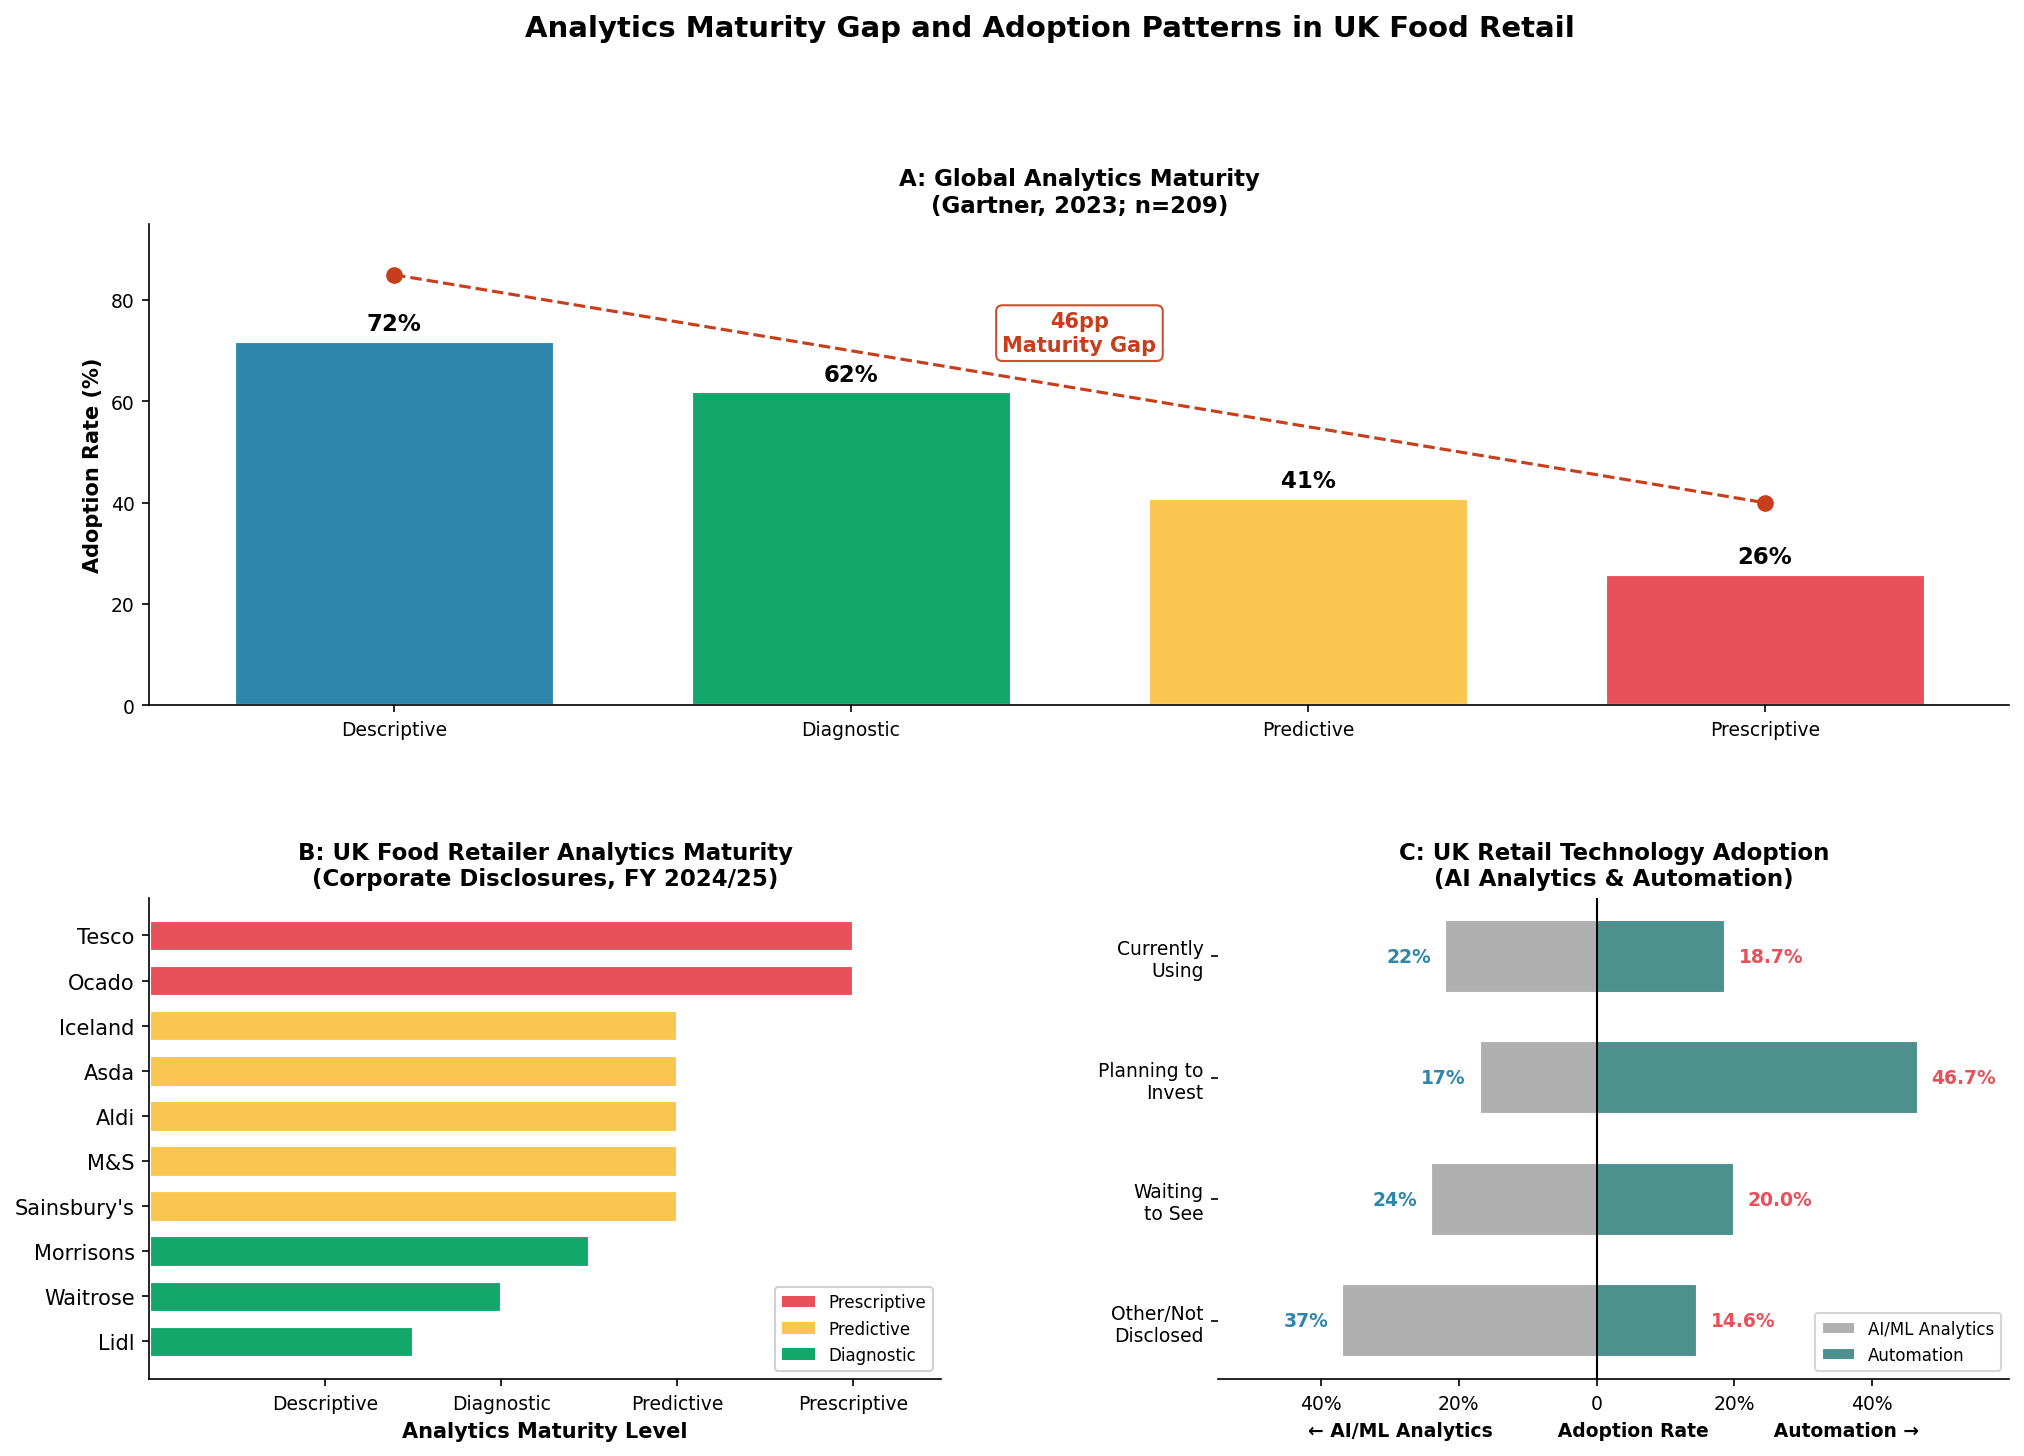

In [6]:
# ═══════════════════════════════════════════════════════════════
# FIGURE 4.1: Analytics Maturity Gap and Adoption Patterns
# Sources: Gartner (2023); BearingPoint (2024); Retail Economics/NatWest (2025)
# ═══════════════════════════════════════════════════════════════

from figure_4_1_analytics_maturity_dashboard import generate_figure

fig = generate_figure()
plt.show()

### The Complexity-Efficiency Trade-Off

Updated availability data from The Grocer (2026) reveals a nuanced pattern. As illustrated in Figure 4.2, **Lidl (Diagnostic, 97.9%)** outperforms Prescriptive and Predictive-tier retailers despite the sector's lowest analytics maturity, whilst **Aldi (Predictive, 97.7%)** achieves comparable availability by combining limited-SKU simplicity with analytics investment.

This dual observation reframes the complexity-efficiency trade-off: demand consolidation across fewer SKUs inherently reduces forecast error (Christopher, 2023), but Aldi's Predictive classification suggests that analytics investment can compound the structural advantage — demand consolidation **amplifies** rather than substitutes for analytical capability.

  ✓ Loaded: Ocado → 120×26px
  ✓ Loaded: Tesco → 120×67px
  ✓ Loaded: Sainsbury's → 120×36px
  ✓ Loaded: M&S → 120×72px
  ✓ Loaded: Aldi → 140×140px
  ✓ Loaded: Iceland → 120×27px
  ✓ Loaded: Asda → 120×67px
  ✓ Loaded: Morrisons → 120×67px
  ✓ Loaded: Waitrose → 120×80px
  ✓ Loaded: Lidl → 140×140px


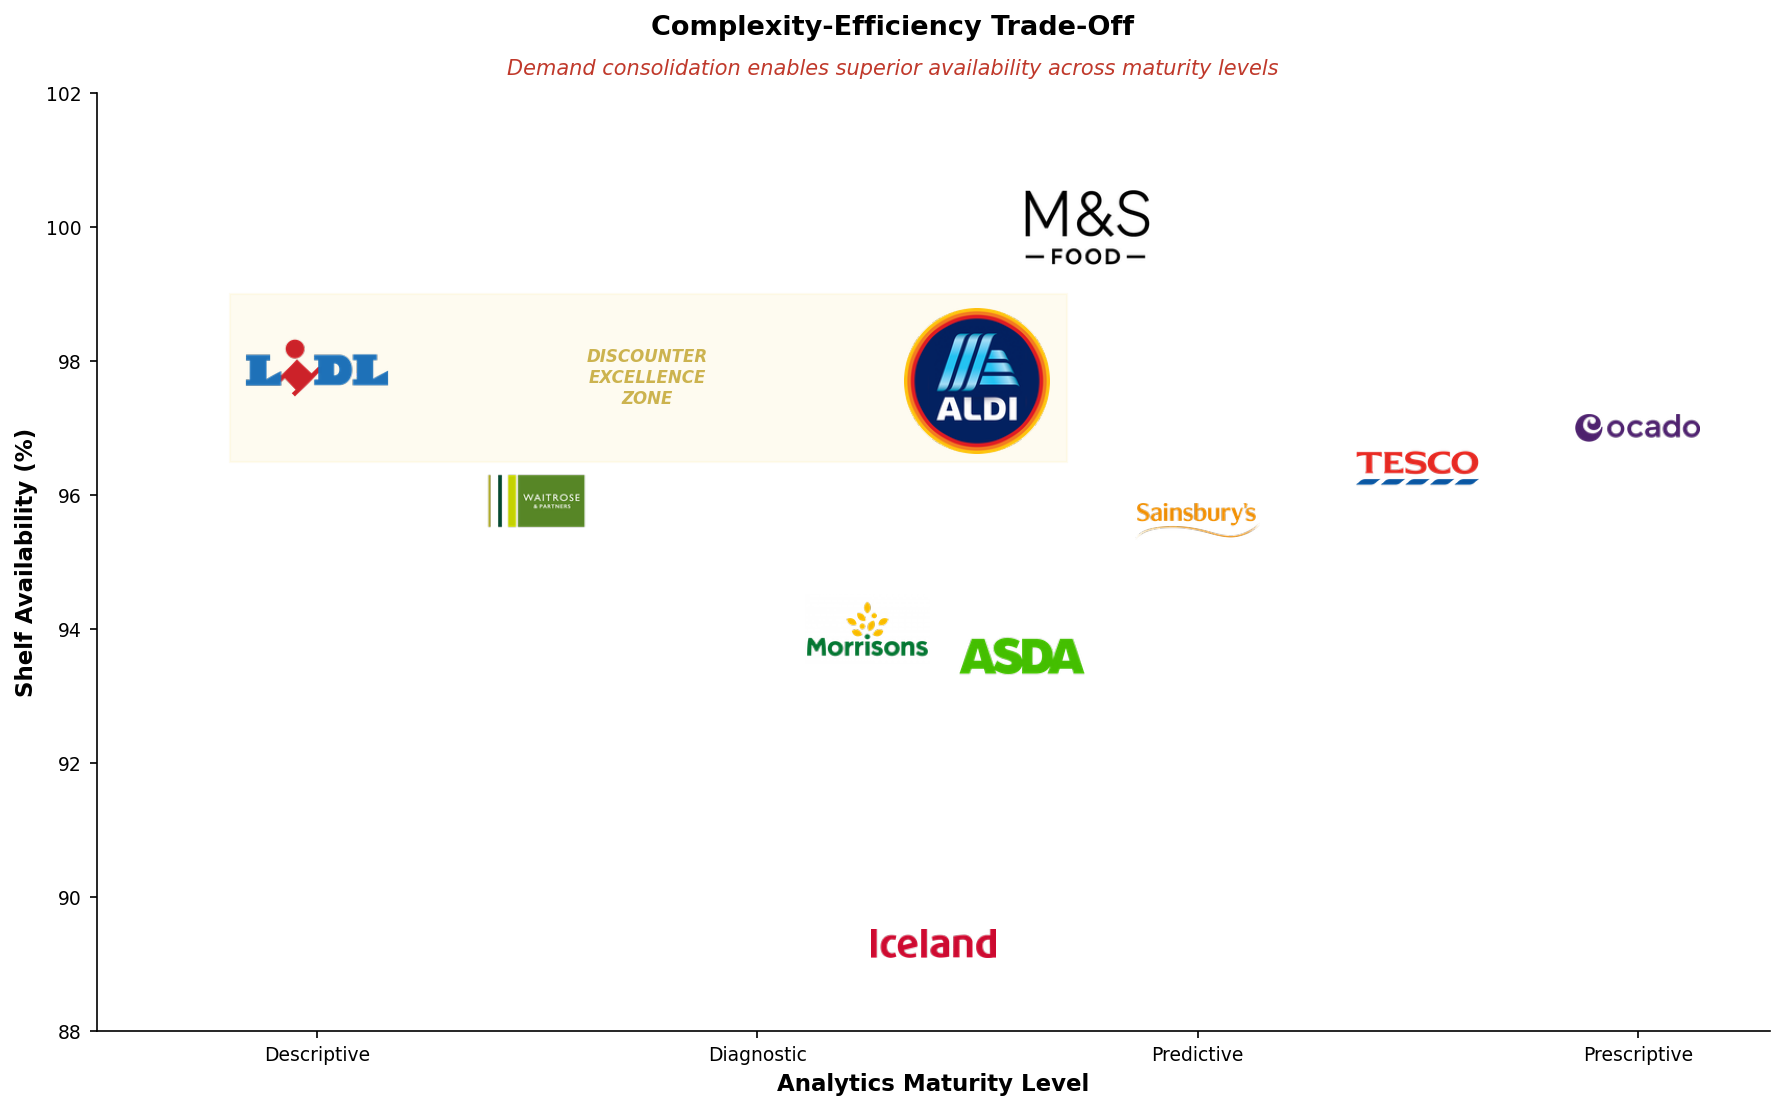

In [7]:
# ═══════════════════════════════════════════════════════════════
# FIGURE 4.2: Complexity-Efficiency Trade-Off
# Availability: The Grocer Week 28 (Jan 2026) Avg YTD
# Analytics maturity: Table 4.1 (Corporate disclosures FY 2024/25)
# Note: This figure uses retailer logos from data/logos/
#       If logos are unavailable, text labels are shown instead
# ═══════════════════════════════════════════════════════════════

from figure_4_2_discounter_complexity_efficiency_trade_off import generate_figure

fig = generate_figure()
plt.show()

### Objective 2: Effectiveness in Reducing Costs and Waste

Three primary mechanisms through which big data optimises inventory management:
1. **Demand forecasting precision** — reduces both holding costs (overstock) and lost sales (understock). Sainsbury's ML migration directly improved availability; RELEX Solutions (2024) estimates 1–3% sales lost to inventory inaccuracies — potentially £2–6bn annually across the £195.3bn UK grocery market.
2. **Markdown optimisation** — preserves margin on near-dated products. Tesco's automation tool ensures discounting at optimal timing.
3. **Operational productivity** — Morrisons' deployment of 200,000 AI-powered shelf cameras into 498 stores demonstrates how real-time gap analysis enhances productivity (+2% stock availability).

To compare retailers of vastly different sizes, data is normalised using **Surplus % of Food Handled**, following Food Loss and Waste Protocol (FLWP, 2016) guidance.

In [8]:
# ═══════════════════════════════════════════════════════════════
# TABLE 4.2: UK Food Retail — Surplus Comparison (FY 2024/25)
# Source: Corporate disclosures; author's calculations per FLWP (2016)
# Note: Four retailers excluded due to incomplete data disclosure
# ═══════════════════════════════════════════════════════════════

table_4_2 = pd.DataFrame({
    'Retailer': ['Morrisons', 'Aldi', 'Iceland', "Sainsbury's", 'Tesco', 'Lidl'],
    'Analytics Maturity': ['Diagnostic/Predictive', 'Predictive', 'Predictive',
                           'Predictive', 'Prescriptive', 'Diagnostic (Trans.)'],
    'Surplus % Handled': [0.44, 0.47, 0.78, 0.85, 1.01, 1.81],
    'Shelf Availability (%)': [94.0, 97.7, 89.3, 95.6, 96.4, 97.9],
    'Key Insight': [
        '🥇 Lowest surplus — targeted AI camera deployment',
        '#2 — Predictive analytics + operational simplicity (~1,800 SKUs)',
        '#3 — Social-mission surplus redistribution (38% reduction)',
        '#4 — ML forecasting platform, £1.6bn cumulative savings',
        '#5 — Largest retailer; "complexity tax" on 30,000+ SKUs',
        '⚠️ Highest — 3.9× higher than Aldi despite similar format',
    ]
})

styled_42 = (table_4_2.style
    .background_gradient(subset=['Surplus % Handled'], cmap='RdYlGn_r', vmin=0.3, vmax=2.0)
    .set_caption('Table 4.2: UK Food Retail — Surplus Comparison (FY 2024/25)')
    .set_table_styles([
        {'selector': 'caption', 'props': [('font-weight', 'bold'), ('font-size', '13px'),
                                            ('text-align', 'left'), ('padding', '8px')]},
        {'selector': 'th', 'props': [('background-color', '#1a365d'), ('color', 'white'),
                                      ('padding', '8px'), ('font-size', '10px')]},
        {'selector': 'td', 'props': [('padding', '6px'), ('font-size', '10px')]},
    ])
    .hide(axis='index')
)
styled_42

Retailer,Analytics Maturity,Surplus % Handled,Shelf Availability (%),Key Insight
Morrisons,Diagnostic/Predictive,0.440000,94.000000,🥇 Lowest surplus — targeted AI camera deployment
Aldi,Predictive,0.470000,97.700000,"#2 — Predictive analytics + operational simplicity (~1,800 SKUs)"
Iceland,Predictive,0.780000,89.300000,#3 — Social-mission surplus redistribution (38% reduction)
Sainsbury's,Predictive,0.850000,95.600000,"#4 — ML forecasting platform, £1.6bn cumulative savings"
Tesco,Prescriptive,1.010000,96.400000,"#5 — Largest retailer; ""complexity tax"" on 30,000+ SKUs"
Lidl,Diagnostic (Trans.),1.810000,97.900000,⚠️ Highest — 3.9× higher than Aldi despite similar format


### The Aldi-Lidl Differential: A Novel Finding

The **3.9× surplus gap** (0.47% vs 1.81%) between retailers sharing similar SKU counts, store formats, and sourcing strategies highlights a critical **analytics maturity gap**. Aldi's investment in **predictive automated ordering** yields dramatically lower surplus than Lidl's continued reliance on **diagnostic tools and manual ordering processes**. This demonstrates that analytics maturity and execution quality compound within similar operational models — technological investment amplifies the structural advantage of demand consolidation rather than merely substituting for it.

Existing inventory management theory, focused predominantly on structural determinants like SKU complexity, has not adequately addressed how divergent analytics maturity produces different outcomes within otherwise comparable business models.

Additionally, Morrisons achieves the sector's lowest surplus rate (0.44%) through targeted AI camera deployment despite mid-tier overall maturity, suggesting that **focused deployment on high-impact inventory management use cases may prove more effective than comprehensive but diffuse technology strategies**.

### Objective 3: Challenges and Opportunities in Scaling

In [9]:
# ═══════════════════════════════════════════════════════════════
# TABLE 4.3: Adoption Barriers Mapped to TOE Framework
# Source: Author's synthesis of secondary data
# ═══════════════════════════════════════════════════════════════

table_4_3 = pd.DataFrame({
    'TOE Dimension': ['Technology', 'Technology', 'Technology',
                      'Organisation', 'Organisation', 'Organisation',
                      'Environment', 'Environment'],
    'Barrier': [
        'Inventory inaccuracy (60% of SKUs)',
        'Data quality concerns (62% cite as primary barrier)',
        'Legacy IT systems (29% of retailers)',
        'Unclear AI use cases (52%)',
        'Skills/analytics talent gap (48%; 90% lack sufficient talent)',
        'Staff turnover (57.3% annual in UK retail)',
        'UK investment gap (18% vs 22% G7 average GDP)',
        'Business pessimism (80%)',
    ],
    'Source': [
        'ECR Retail Loss (2019)',
        'Capgemini (2025)',
        'BearingPoint (2024)',
        'Gartner (2023)',
        'McKinsey (2024)',
        'BearingPoint (2024)',
        'World Bank (2025)',
        'IoD (2025)',
    ],
    'Impact': [
        '"Garbage in, garbage out" — undermines all analytics',
        'Foundational constraint; limits Volume/Velocity/Variety value',
        'Prevents integration of modern analytics tools',
        'Prevents ROI quantification and executive buy-in',
        'Universal and persistent (unchanged since 2020)',
        'Erodes institutional knowledge and training investment',
        'Structural underinvestment constrains digital transformation',
        'Psychological barrier to strategic investment',
    ]
})

def colour_toe(val):
    colours = {
        'Technology': 'background-color: #fed7d7; color: #c53030',
        'Organisation': 'background-color: #fefcbf; color: #975a16',
        'Environment': 'background-color: #c6f6d5; color: #276749',
    }
    return colours.get(val, '')

styled_43 = (table_4_3.style
    .applymap(colour_toe, subset=['TOE Dimension'])
    .set_caption('Table 4.3: Adoption Barriers Mapped to TOE Framework')
    .set_table_styles([
        {'selector': 'caption', 'props': [('font-weight', 'bold'), ('font-size', '13px'),
                                            ('text-align', 'left'), ('padding', '8px')]},
        {'selector': 'th', 'props': [('background-color', '#1a365d'), ('color', 'white'),
                                      ('padding', '8px'), ('font-size', '10px')]},
        {'selector': 'td', 'props': [('padding', '6px'), ('font-size', '10px')]},
    ])
    .hide(axis='index')
)
styled_43

TOE Dimension,Barrier,Source,Impact
Technology,Inventory inaccuracy (60% of SKUs),ECR Retail Loss (2019),"""Garbage in, garbage out"" — undermines all analytics"
Technology,Data quality concerns (62% cite as primary barrier),Capgemini (2025),Foundational constraint; limits Volume/Velocity/Variety value
Technology,Legacy IT systems (29% of retailers),BearingPoint (2024),Prevents integration of modern analytics tools
Organisation,Unclear AI use cases (52%),Gartner (2023),Prevents ROI quantification and executive buy-in
Organisation,Skills/analytics talent gap (48%; 90% lack sufficient talent),McKinsey (2024),Universal and persistent (unchanged since 2020)
Organisation,Staff turnover (57.3% annual in UK retail),BearingPoint (2024),Erodes institutional knowledge and training investment
Environment,UK investment gap (18% vs 22% G7 average GDP),World Bank (2025),Structural underinvestment constrains digital transformation
Environment,Business pessimism (80%),IoD (2025),Psychological barrier to strategic investment


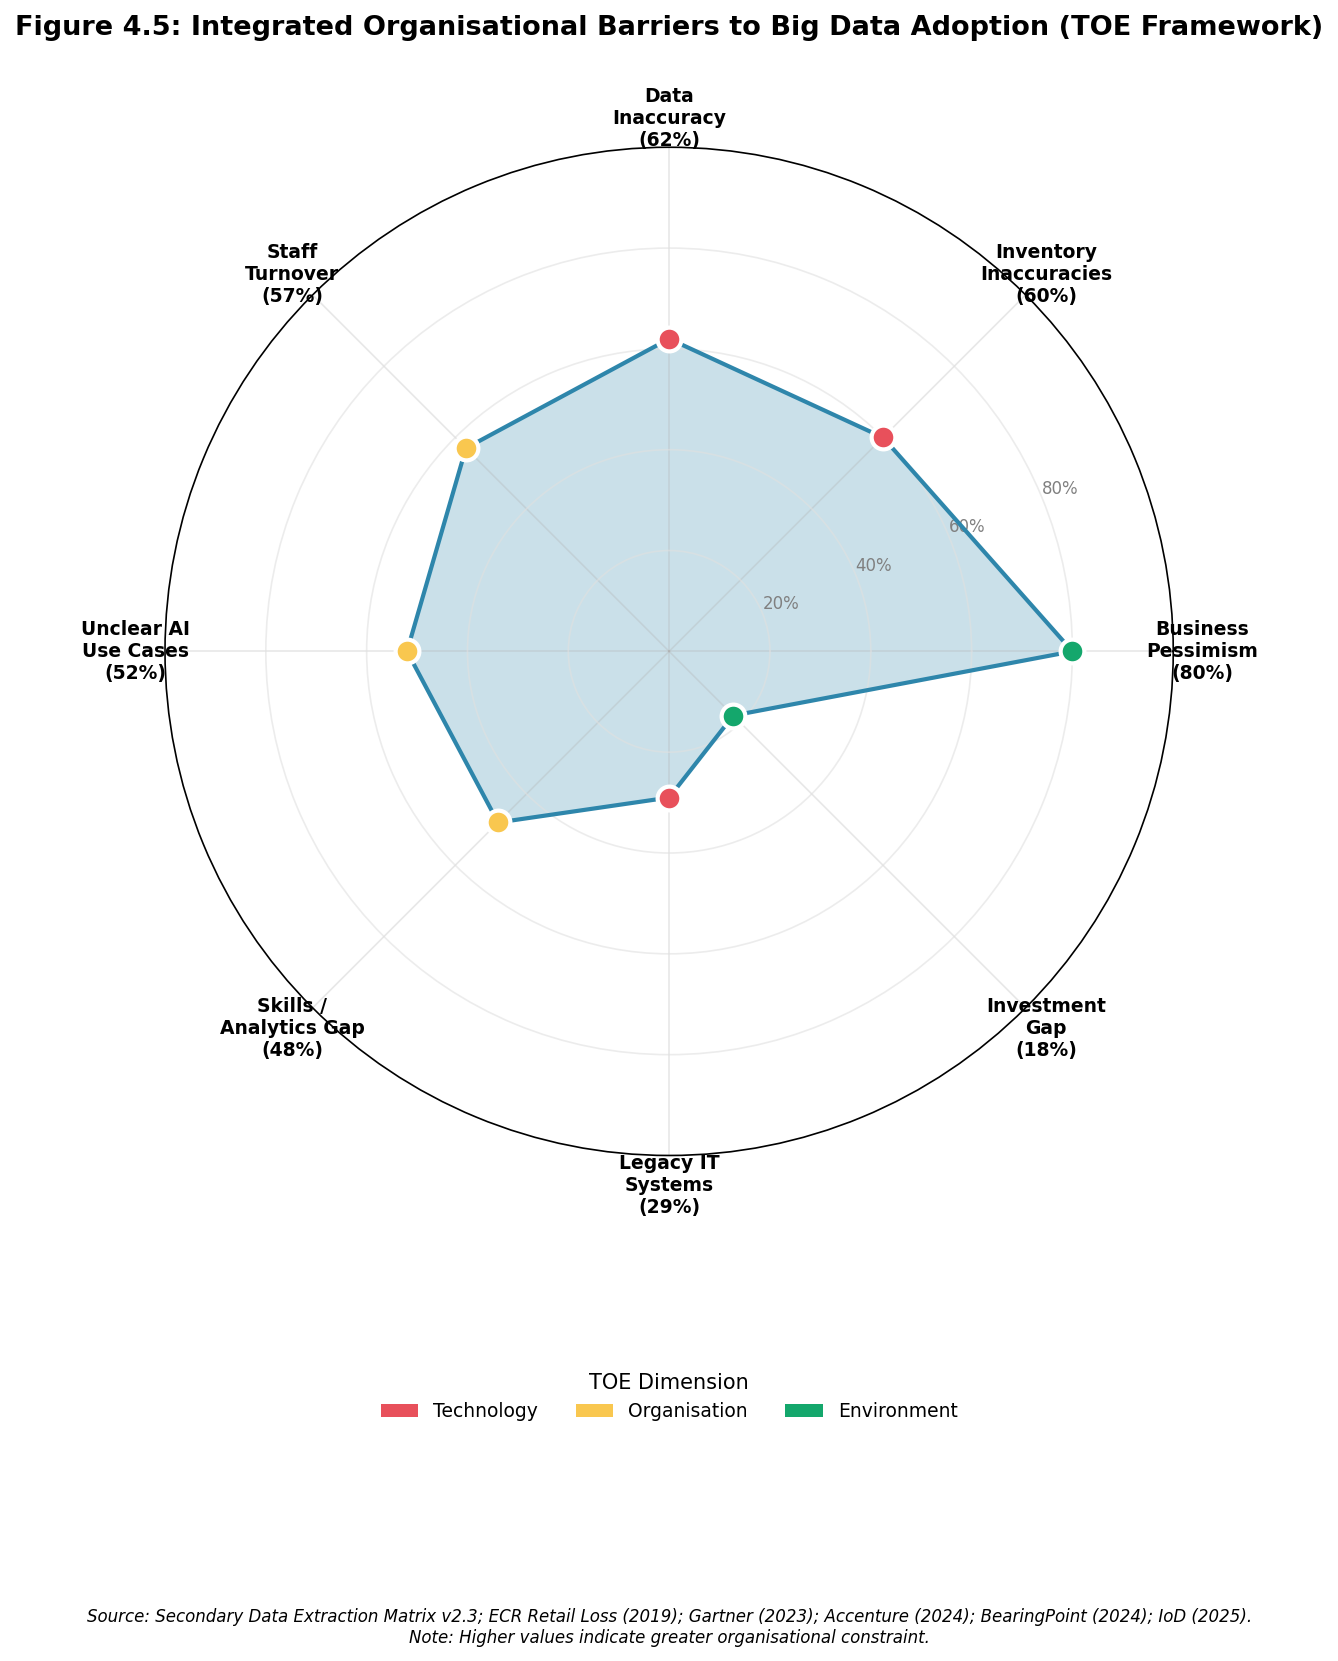

In [10]:
# ═══════════════════════════════════════════════════════════════
# FIGURE 4.5: TOE Adoption Barriers Radar
# Sources: ECR Retail Loss (2019); Gartner (2023);
#          BearingPoint (2024); IoD (2025); World Bank (2025)
# ═══════════════════════════════════════════════════════════════

from figure_4_5_toe_barriers_radar import generate_figure

fig = generate_figure()
plt.show()

### The Structural Investment Gap

The environmental barriers identified above are rooted in a persistent structural underinvestment. World Bank (2025) data reveals that UK gross fixed capital formation averaged **18.0% of GDP** from 1995–2023, compared with **21.9%** for other G7 nations — a **3.9 percentage point gap** that has remained remarkably stable across economic cycles. This chronic investment deficit, spanning multiple governments and policy regimes, explains the legacy technology constraints that impede digital transformation in UK food retail.

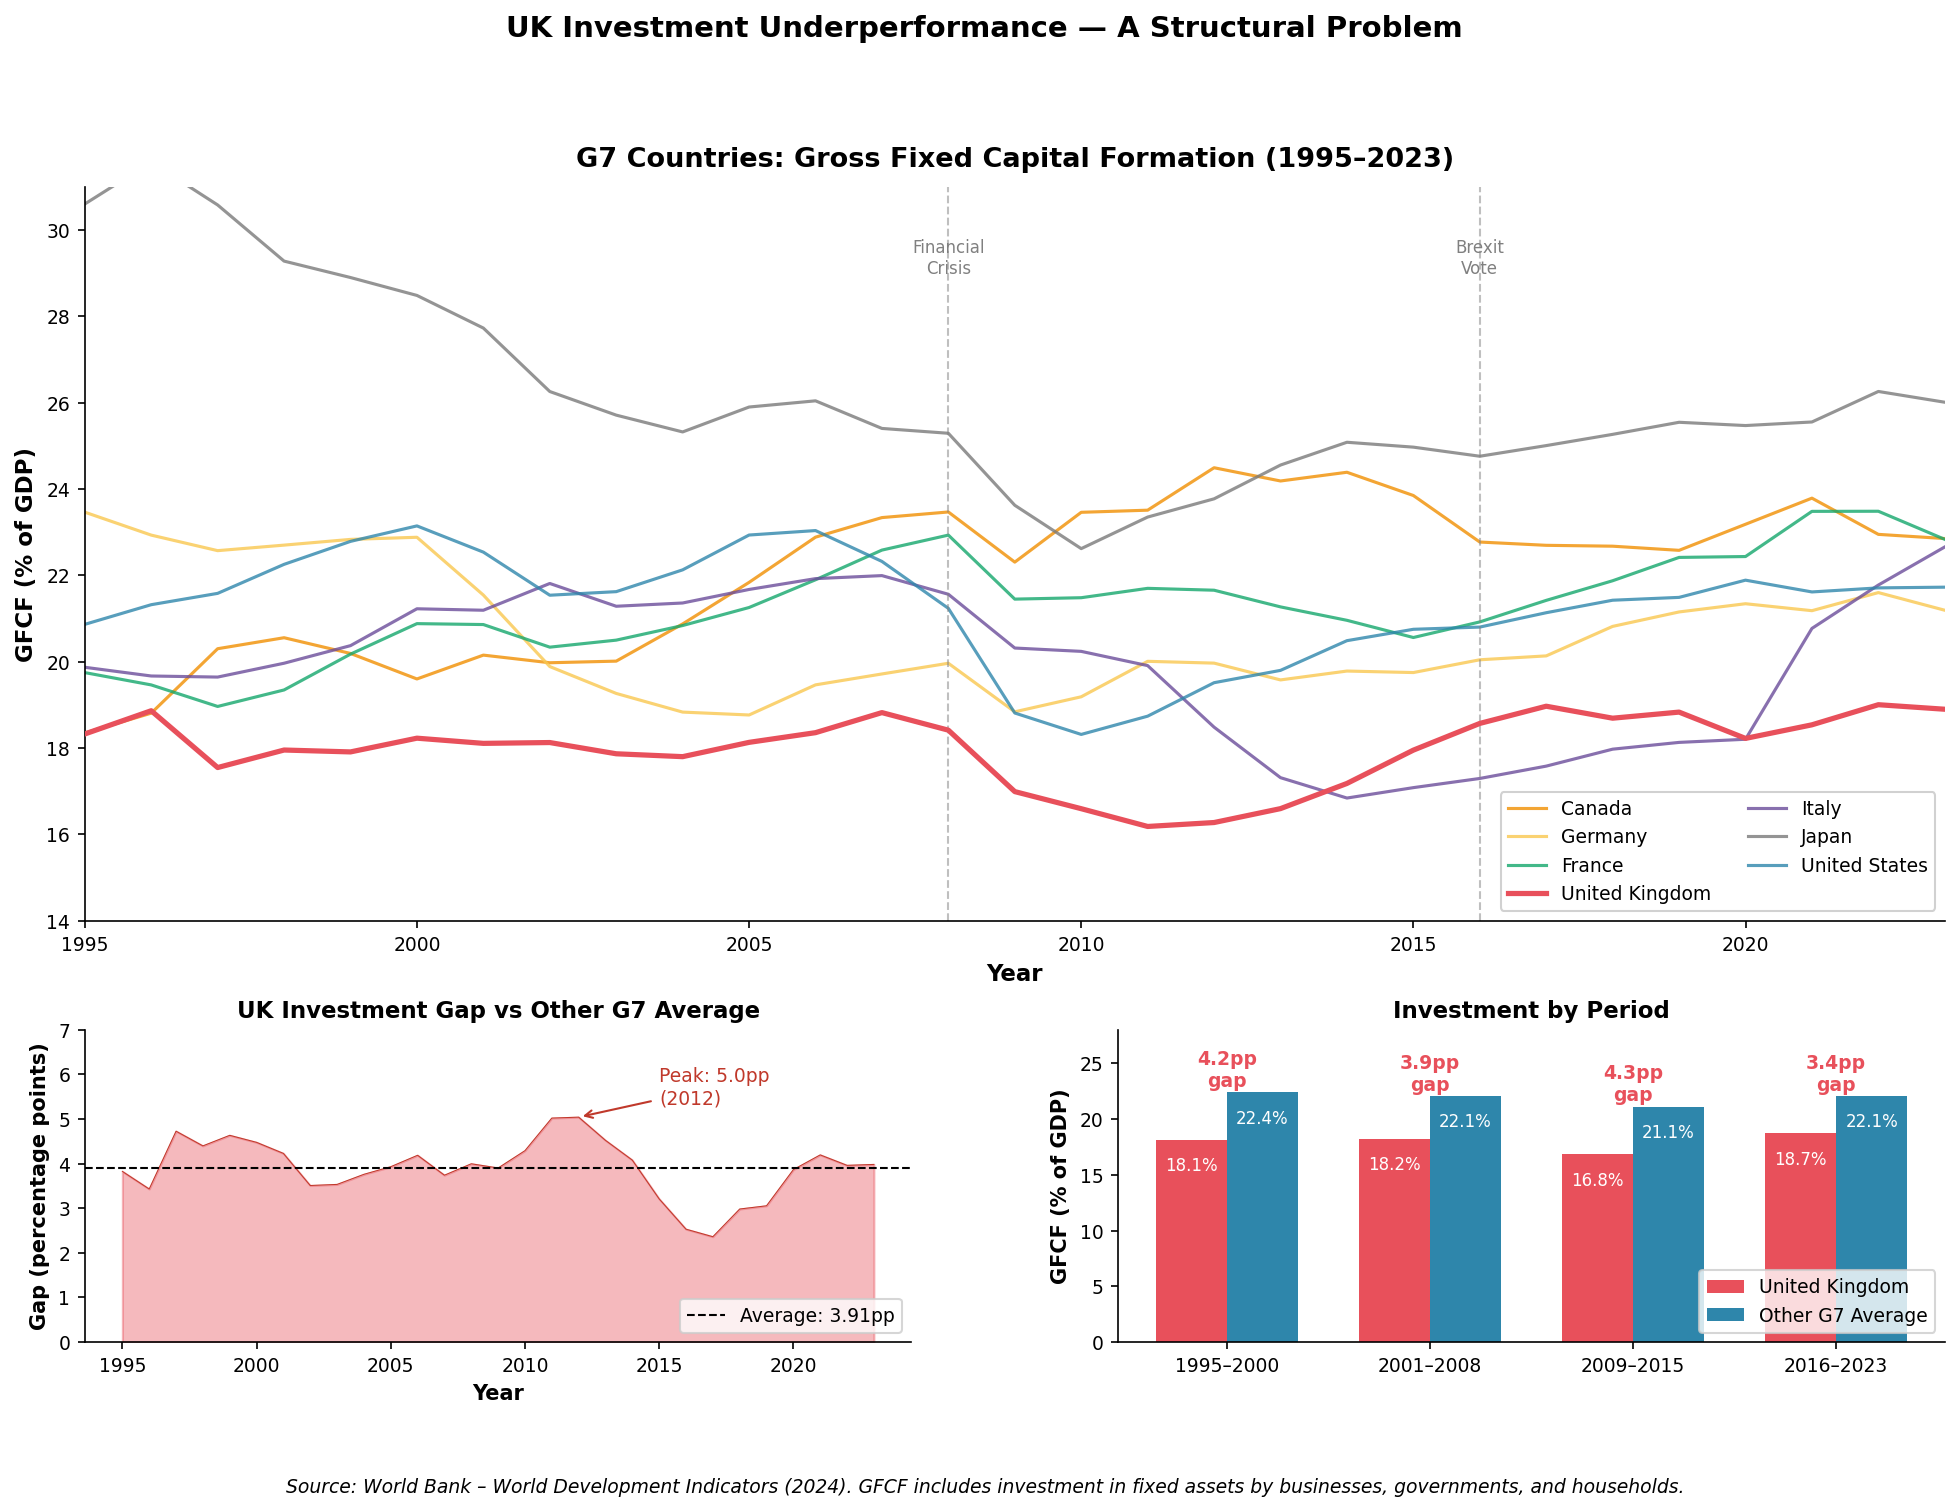

In [11]:
# ═══════════════════════════════════════════════════════════════
# APPENDIX C: G7 Gross Fixed Capital Formation Analysis (1995–2023)
# Source: World Bank — World Development Indicators (2024)
# Note: Requires data/API_NE.GDI.FTOT.ZS_DS2_en_excel_v2_174226.xls
#       Download from: https://data.worldbank.org/indicator/NE.GDI.FTOT.ZS
# ═══════════════════════════════════════════════════════════════

from appendix_c_gfcf_analysis import load_data, generate_figure

try:
    df = load_data()
    fig = generate_figure(df)
    plt.show()
except FileNotFoundError:
    print("⚠️  Data file not found: API_NE.GDI.FTOT.ZS_DS2_en_excel_v2_174226.xls")
    print("    Download from: https://data.worldbank.org/indicator/NE.GDI.FTOT.ZS")
    print("    Place in: data/ directory")
    print()
    print("    Key statistic: UK averaged 18.0% GFCF/GDP vs 21.9% G7 average (1995–2023)")
    print("    → Persistent 3.9pp structural investment gap")

## Chapter 5: Conclusions and Recommendations

### Research Contributions to Knowledge

This research makes **three theoretical contributions:**

1. **TOE Framework extension** — Demonstrates that technological capability proves insufficient without organisational readiness and supportive environmental context in UK food retail BD adoption.

2. **Analytics maturity as a compounding variable** — While the complexity-efficiency trade-off confirms existing theoretical predictions about SKU proliferation and demand variability, the Aldi-Lidl differential (3.9× surplus gap) reveals that divergent **analytics maturity** (Predictive vs Diagnostic) produces dramatically different inventory outcomes within otherwise comparable business models. Aldi's investment in predictive automated ordering compounds the structural advantage of demand consolidation, whilst Lidl's reliance on diagnostic tools and manual processes leaves that advantage partially unrealised — demonstrating that analytics maturity and execution quality are inseparable determinants of inventory efficiency.

3. **Targeted vs comprehensive strategies** — The finding that Morrisons' targeted AI camera deployment (Diagnostic maturity, 0.44% surplus) can outperform comprehensive Predictive-tier strategies (0.85–1.01% surplus) challenges linear assumptions about analytics maturity and inventory efficiency, suggesting strategic focus may matter more than comprehensive capability.

### Key Recommendations

| # | For | Recommendation |
|---|-----|----------------|
| R1 | Retailers | Prioritise data veracity before analytics sophistication |
| R2 | Retailers | Adopt targeted deployment aligned with Pareto principles (19% SKUs → 70% sales) |
| R3 | Retailers | Establish dedicated AI governance and integration functions |
| R4 | Retailers | Consider operational simplification as a complementary strategy |
| R5 | Retailers | Investigate execution quality within chosen models |
| R6 | Policymakers | Develop standardised BD disclosure frameworks |
| R7 | Policymakers | Address structural investment constraints (3.9pp UK–G7 gap) |
| R8 | Vendors | Emphasise integration and change management alongside technical capability |

### Research Limitations

Six limitations qualify these findings: reliance on corporate disclosures with inherent impression management biases; cross-sectional design limiting causal inference; interpretivist methodology prioritising depth over statistical generalisability; AI-assisted extraction requiring validation (9.9% rejection rate); absence of primary operational data; and shelf availability comparisons relying on The Grocer's proprietary tracking methodology rather than independently audited figures.

### Personal Reflection

> *This dissertation bridged my fifteen years of retail operations experience — across Carrefour, Ocado, and Waitrose — with academic frameworks that provided vocabulary for patterns I had observed but could not systematically articulate. The research process taught epistemic humility. My initial framing of the discounter advantage as 'paradoxical' required revision when I recognised the complexity-efficiency trade-off confirmed existing theory. The genuinely novel contribution — the Aldi-Lidl execution differential — emerged only through willingness to refine initial interpretations.*

---

*Full dissertation, complete reference list, and appendices available via the links at the top of this notebook.*

---

**© 2026 Jonathan Duque González** · University of Suffolk  
BA (Hons) Global Business Management Dissertation  

📄 [Full Dissertation (Google Docs)](https://docs.google.com/document/d/1-qCnUn2IiR2hAKZ4Be6n_TbA5-YWT4BR/edit?usp=sharing&ouid=108141792940395886349&rtpof=true) · 💻 [GitHub Repository](https://github.com/jduquegonzalez)